<a href="https://colab.research.google.com/github/sheenakhanna/Fake-News-Detection-Visualization/blob/main/Fake_news_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re
import nltk
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(r'/content/corona_fake.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1082 non-null   object
 1   text    1154 non-null   object
 2   source  1144 non-null   object
 3   label   1159 non-null   object
dtypes: object(4)
memory usage: 36.5+ KB


In [ ]:
print('Our dataset consists of', df.shape[0], 'samples each having',df.shape[1],'attributes') 

Our dataset consists of 1164 samples each having 4 attributes


In [ ]:
print('Following is our attibutes:', df.columns)

Following is our attibutes: Index(['title', 'text', 'source', 'label'], dtype='object')


In [ ]:
df.head(5)

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake


In [ ]:
df.isnull().sum()

title     82
text      10
source    20
label      5
dtype: int64

In [ ]:
df=df.dropna(subset=['label']) # remove null labels
df["title"].fillna(" ", inplace = True) # removing with spaces
df["text"].fillna(" ", inplace = True)  # removing with spaces

In [ ]:
df.isnull().sum()

title      0
text       0
source    17
label      0
dtype: int64

In [ ]:
labelencoder = LabelEncoder()
df['updated_label'] = labelencoder.fit_transform(df['label'])

In [ ]:
df.isnull().sum()

title             0
text              0
source           17
label             0
updated_label     0
dtype: int64

In [ ]:
df['combined']=df['title']+' '+ df['text']

In [ ]:
df.head(2)

,title,text,source,label,updated_label,combined
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0,Hydroxychloroquine has been shown to have a ...


In [ ]:
data=df['combined'].tolist()
label=df['updated_label'].tolist()

Visualizations 


In [ ]:
df['title_num_uppercase'] = df['title'].str.count(r'[A-Z]')
df['text_num_uppercase'] = df['text'].str.count(r'[A-Z]')
df['text_len'] = df['text'].str.len()
df['text_pct_uppercase'] = df.text_num_uppercase.div(df.text_len)

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
#Capital letters in title
x1 = df.loc[df['label']=='TRUE']['title_num_uppercase']
x2 = df.loc[df['label'] == 'Fake']['title_num_uppercase']
group_labels = ['TRUE', 'Fake']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([x1, x2], group_labels,colors=colors)

fig.update_layout(title_text='Capital Letters in title', template="plotly_white")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=x1, name='TRUE',
                marker_color = 'rgb(0, 0, 100)'))
fig.add_trace(go.Box(y=x2, name = 'FAKE',
                marker_color = 'rgb(0, 200, 200)'))
fig.update_layout(title_text='Box plot of Capital Letter in title', template="plotly_white")
fig.show()

In [ ]:
#fake news have way more words that appear in capital letters in the title.

* Stopwords



In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['title_num_stop_words'] = df['title'].str.split().apply(lambda x: len(set(x) & stop_words))
df['text_num_stop_words'] = df['text'].str.split().apply(lambda x: len(set(x) & stop_words))
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_pct_stop_words'] = df['text_num_stop_words'] / df['text_word_count']

x1 = df.loc[df['label']=='TRUE']['title_num_stop_words']
x2 = df.loc[df['label'] == 'Fake']['title_num_stop_words']
group_labels = ['TRUE', 'Fake']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot(
    [x1, x2], group_labels,colors=colors)

fig.update_layout(title_text='Stop Words in title', template="plotly_white")
fig.show()


In [ ]:
#Fake news titles have fewer stopwords than those of real news

In [ ]:
df.loc[df['label']=='TRUE']['title_num_uppercase'].describe()

count    584.000000
mean       4.561644
std        5.215721
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       60.000000
Name: title_num_uppercase, dtype: float64

In [ ]:
df.loc[df['label']=='Fake']['title_num_uppercase'].describe()

count    345.00000
mean      16.44058
std       23.82525
min        0.00000
25%        2.00000
50%        7.00000
75%       15.00000
max      111.00000
Name: title_num_uppercase, dtype: float64

In [ ]:
df.drop(['text_num_uppercase', 'text_len', 'text_num_stop_words', 'text_word_count'], axis=1, inplace=True)

In [ ]:
df.head(1)

,title,text,source,label,updated_label,combined,title_num_uppercase,text_pct_uppercase,title_num_stop_words,text_pct_stop_words
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...,11,0.007752,4,0.184615


Proper Nouns

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=x1, name='TRUE',
                marker_color = 'rgb(0, 0, 100)'))
fig.add_trace(go.Box(y=x2, name = 'Fake',
                marker_color = 'rgb(0, 200, 200)'))
fig.update_layout(title_text='Box plot of Proper nouns in title', template="plotly_white")
fig.show()

In [ ]:
#true news titles have more proper nouns

In [ ]:
df=df.drop(['title_num_uppercase','text_pct_stop_words','text_pct_uppercase','title_num_stop_words'], axis=1)

In [ ]:
df.head(1)

,title,text,source,label,updated_label,combined
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...


Sentiment Analysis using Vader library

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
df["title"].apply(sid.polarity_scores)

0       {'neg': 0.056, 'neu': 0.847, 'pos': 0.097, 'co...
1       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
                              ...                        
1159    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1160    {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...
1161    {'neg': 0.305, 'neu': 0.695, 'pos': 0.0, 'comp...
1162    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1163    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
Name: title, Length: 1159, dtype: object

In [ ]:
df["text"].apply(sid.polarity_scores)


0       {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...
1       {'neg': 0.073, 'neu': 0.819, 'pos': 0.108, 'co...
2       {'neg': 0.149, 'neu': 0.754, 'pos': 0.097, 'co...
3       {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...
4       {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...
                              ...                        
1159    {'neg': 0.082, 'neu': 0.845, 'pos': 0.073, 'co...
1160    {'neg': 0.087, 'neu': 0.86, 'pos': 0.054, 'com...
1161    {'neg': 0.037, 'neu': 0.9, 'pos': 0.064, 'comp...
1162    {'neg': 0.057, 'neu': 0.857, 'pos': 0.087, 'co...
1163    {'neg': 0.039, 'neu': 0.849, 'pos': 0.112, 'co...
Name: text, Length: 1159, dtype: object

In [ ]:
df["combined"].apply(sid.polarity_scores)

0       {'neg': 0.015, 'neu': 0.883, 'pos': 0.102, 'co...
1       {'neg': 0.073, 'neu': 0.819, 'pos': 0.108, 'co...
2       {'neg': 0.149, 'neu': 0.754, 'pos': 0.097, 'co...
3       {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...
4       {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...
                              ...                        
1159    {'neg': 0.082, 'neu': 0.846, 'pos': 0.073, 'co...
1160    {'neg': 0.087, 'neu': 0.86, 'pos': 0.053, 'com...
1161    {'neg': 0.039, 'neu': 0.898, 'pos': 0.063, 'co...
1162    {'neg': 0.056, 'neu': 0.857, 'pos': 0.086, 'co...
1163    {'neg': 0.038, 'neu': 0.847, 'pos': 0.115, 'co...
Name: combined, Length: 1159, dtype: object

In [ ]:
df['title_scores'] = df['title'].apply(lambda review: sid.polarity_scores("title"))

In [ ]:
df['compound']  = df['title_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df['comp_score'] = df['compound'].apply(lambda c: 'neu' if c >=0 else 'neg')
df.head(3)

,title,text,source,label,updated_label,combined,title_scores,compound,comp_score
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0,Hydroxychloroquine has been shown to have a ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,0,Fact: Hydroxychloroquine has been shown to h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu


In [ ]:
df['text_scores'] = df['text'].apply(lambda review: sid.polarity_scores("text"))

In [ ]:
df['compound']  = df['text_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df['comp_score_text'] = df['compound'].apply(lambda c: 'neu' if c >=0 else 'neg')
df.head(3)

,title,text,source,label,updated_label,combined,title_scores,compound,comp_score,text_scores,comp_score_text
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0,Hydroxychloroquine has been shown to have a ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,0,Fact: Hydroxychloroquine has been shown to h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu


In [ ]:
df['combined_scores'] = df['combined'].apply(lambda review: sid.polarity_scores("combined"))

In [ ]:
df['compound']  = df['combined_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df['comp_score_total'] = df['compound'].apply(lambda c: 'neu' if c >=0 else 'neg')

df.head(3)

,title,text,source,label,updated_label,combined,title_scores,compound,comp_score,text_scores,comp_score_text,combined_scores,comp_score_total
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0,Hydroxychloroquine has been shown to have a ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,0,Fact: Hydroxychloroquine has been shown to h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu


In [ ]:
df = df.drop(['comp_score_total','combined_scores','comp_score_text','text_scores','comp_score','compound','title_scores'],axis=1)

In [ ]:
df.head(1)

,title,text,source,label,updated_label,combined
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0,Due to the recent outbreak for the Coronavirus...


Wordclouds


* Wordcloud on text



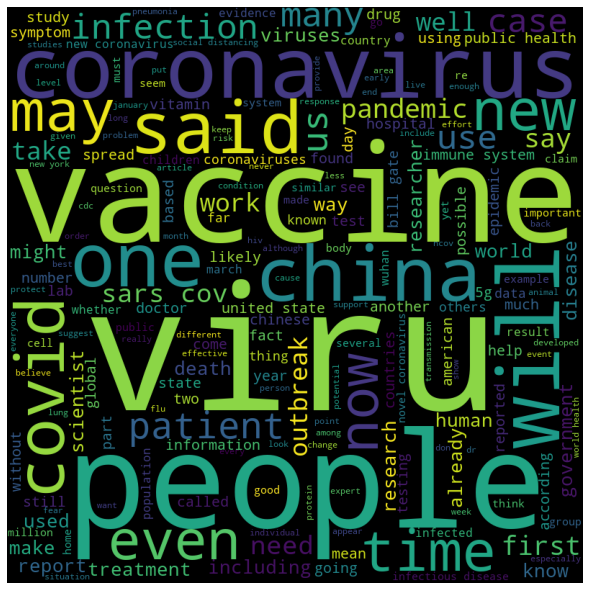

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df.text: 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()                 

* Wordcloud on title




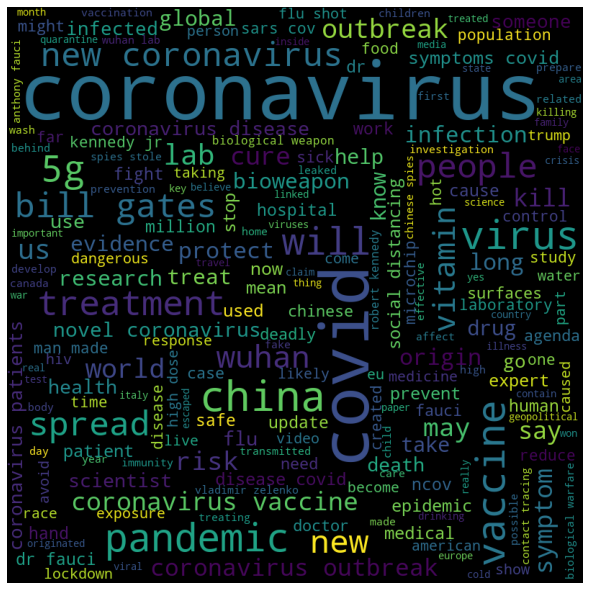

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df.title: 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  plt.show()                 

Data Preprocessing

In [ ]:
import string
from nltk.corpus import stopwords

def remove_punctuation(s):
    list_punctuation = list(string.punctuation)
    for i in list_punctuation:
        s = s.replace(i,'')
    return s

In [ ]:
def clean_data(text):
    sentence=text.lower()
    tokens = sentence.split()
    tokens = [remove_punctuation(w) for w in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = ' '.join(tokens)
    return tokens

In [ ]:
cleaned_data=[clean_data(item) for item in data]